# Pymaceuticals.Inc
---------------------------------------------------------------------------------

## Analysis:

       -Observed Trend 1: Capomulin has obvious effect in reducing tumor size in mouse object and shows the best survivial rate and optimistic Metstatic spread results.

       -Observed Trend 2: Placebo, Infubiol and Ketapril was not that effective in curing tumor and maintinaing survivial rate since they shows similer trend in all graphs.

       -Observed Trend 3: Capomulin shows negative amount of tumer size changes in terms of day to day

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

In [3]:
clinic = pd.read_csv('raw_data/clinicaltrial_data.csv')
mousedrug = pd.read_csv('raw_data/mouse_drug_data.csv')

len(mousedrug['Mouse ID'].unique())
mousedrug2 = mousedrug.sort_values('Mouse ID').set_index('Mouse ID')
df = clinic.merge(mousedrug, how= 'left', on= 'Mouse ID' )
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Volume Analysis

In [4]:
chosen_drug=['Capomulin', 'Infubinol','Ketapril', 'Placebo' ]
data_df = df.groupby(['Timepoint', 'Drug']).agg({'Tumor Volume (mm3)':'mean'}).unstack()['Tumor Volume (mm3)']
data_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
chosen_drug=['Capomulin', 'Infubinol','Ketapril', 'Placebo' ]
for treatments in chosen_drug:
        mask = df['Drug']== treatments
        error= df[mask].groupby('Timepoint')['Tumor Volume (mm3)'].sem()
error

Timepoint
0     0.000000
5     0.218091
10    0.402064
15    0.614461
20    0.839609
25    1.034872
30    1.218231
35    1.287481
40    1.370634
45    1.351726
Name: Tumor Volume (mm3), dtype: float64

In [12]:
def Tumor_treatment_overtime(y, way):
    chosen_drug=['Capomulin', 'Infubinol','Ketapril', 'Placebo' ]
    data_df = df.groupby(['Timepoint', 'Drug']).agg({ y : way}).unstack()[y]
    
    for treatments in chosen_drug:
        mask = df['Drug']== treatments
        error= df[mask].groupby('Timepoint')[y].sem()
        plot = plt.errorbar(data_df.index, data_df[treatments], yerr=error, fmt='-o', label = treatments, capthick = 5, capsize = 5)
    return plot


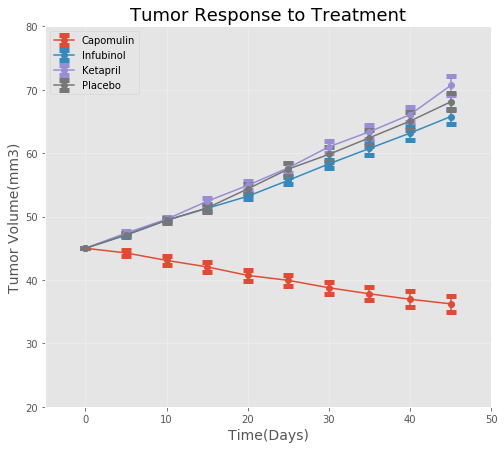

In [7]:
plt.style.use('ggplot')
fig1 = plt.figure(figsize = (8,7))
tumorSize = Tumor_treatment_overtime('Tumor Volume (mm3)', 'mean')
plt.plot(c = ['b','green','k','r'])
plt.legend(loc = 'best')
plt.ylim(20,80)
plt.xlim(-5,50)
plt.grid(alpha = 0.3)
plt.xlabel('Time(Days)', fontsize = 14)
plt.ylabel('Tumor Volume(mm3)', fontsize = 14)
plt.title('Tumor Response to Treatment', fontsize = 18)


plt.show()


In [8]:
#plt.savefig('Tumor Response to Treatment')
plt.close()

## Metastatic Sites Analysis

In [9]:
data_df = df.groupby(['Timepoint', 'Drug']).agg({'Metastatic Sites':'mean'}).unstack()['Metastatic Sites']
data_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
chosen_drug=['Capomulin', 'Infubinol','Ketapril', 'Placebo' ]
for treatments in chosen_drug:
        mask = df['Drug']== treatments
        error= df[mask].groupby('Timepoint')['Metastatic Sites'].sem()
error

Timepoint
0     0.000000
5     0.100947
10    0.115261
15    0.190221
20    0.234064
25    0.263888
30    0.300264
35    0.341412
40    0.297294
45    0.304240
Name: Metastatic Sites, dtype: float64

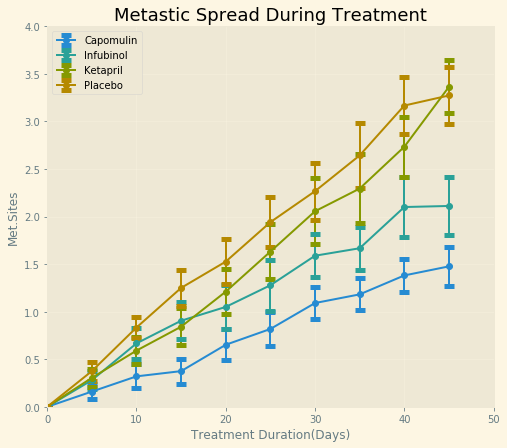

In [13]:

plt.style.use('Solarize_Light2')
fig1 = plt.figure(figsize = (8,7))
Metast= Tumor_treatment_overtime('Metastatic Sites', 'mean')
plt.plot(c = ['b','green','k','r'])
plt.ylim(0,4)
plt.xlim(0,50)
plt.legend(loc = 'upper left')
plt.grid(alpha = 0.3)
plt.xlabel('Treatment Duration(Days)')
plt.ylabel('Met.Sites')
plt.title('Metastic Spread During Treatment', fontsize = 18)



plt.show()

In [14]:
#plt.savefig('Metastic Spread During Treatment')
plt.close()

## Survival Rate Analysis

In [15]:
mouse_count= df.groupby(['Drug', 'Timepoint'])
mouse_count= mouse_count.agg({'Mouse ID':'count'})
mouse_count.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [16]:
def Tumor_survival_overtime(y, way):
    chosen_drug=['Capomulin', 'Infubinol','Ketapril', 'Placebo' ]
    data_df = df.groupby(['Timepoint', 'Drug']).agg({ y : way}).unstack()[y]
    
    for treatments in chosen_drug:
        plot = plt.errorbar(data_df.index, data_df[treatments], fmt='-o', label = treatments)
    return plot

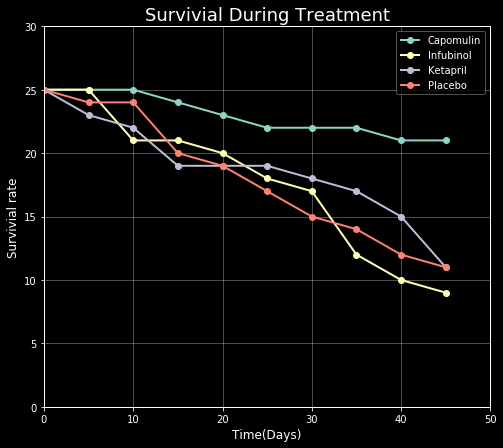

In [17]:
plt.style.use('dark_background')
fig1 = plt.figure(figsize = (8,7))
survovial_rate= Tumor_survival_overtime('Mouse ID', 'count')
plt.plot(c = ['b','green','k','r'])
plt.ylim(0,30)
plt.xlim(0,50)
plt.legend(loc = 'best')
plt.grid(alpha = 0.3)
plt.xlabel('Time(Days)')
plt.ylabel('Survivial rate')
plt.title('Survivial During Treatment', fontsize = 18)





plt.show()
    

In [94]:
#plt.savefig('Survivial rate')
plt.close()

## Summery

In [95]:
chosen_drug=['Capomulin', 'Infubinol','Ketapril', 'Placebo' ]
data_df = df.groupby(['Timepoint', 'Drug']).agg({'Tumor Volume (mm3)':'mean'}).unstack()['Tumor Volume (mm3)']
data_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [96]:
data3= data_df.ix[data_df.index , chosen_drug]
list3 = []
for i in chosen_drug :
    change_deci =(data3.loc[45,i] - data3.loc[5,i])/data3.loc[5,i]
    list3.append(change_deci)
Series2 = pd.Series(list3, chosen_drug)
Series2


/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Capomulin   -0.181402
Infubinol    0.397211
Ketapril     0.491120
Placebo      0.444737
dtype: float64

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


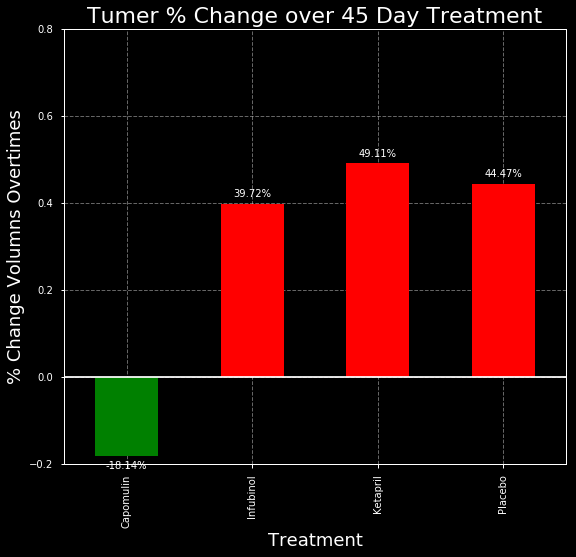

In [103]:
y = pd.DataFrame(Series2)
plt.style.use('seaborn-notebook')
fig = plt.figure(figsize=(9,8))
ax = y.ix[['Capomulin', 'Infubinol', 'Ketapril','Placebo' ], 0].plot(kind = 'bar', colors = ['g', 'r','r','r'])
plt.grid(alpha = 0.4, linestyle = '--')
plt.xlabel('Treatment', fontsize = 18)
plt.ylabel('% Change Volumns Overtimes', fontsize = 18)
plt.title("Tumer % Change over 45 Day Treatment", fontsize = 22)
plt.ylim(-0.2, 0.8)

x_axis = np.arange(len(['Capomulin', 'Infubinol', 'Ketapril','Placebo' ]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,['Capomulin', 'Infubinol', 'Ketapril','Placebo' ])

rects = ax.patches


for rect in rects:
    
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5    
    va = 'bottom'
    
    if y_value < 0:        
        space *= -1      
        va = 'top'    
    label = "{:.2%}".format(y_value)  
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va) 
plt.axhline(y=0, color='w', linestyle='-')
plt.show()

In [ ]:
plt.savefig('Tumor Summery')
plt.close()